In [1]:
#file to count the word HOSPITAL 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_no_hospitals(inputText):
  # convert inputText to lower case
  if type(inputText) != str:
    return 0

  if "HOSPITAL7" in inputText:
    result = 7
  elif "HOSPITAL6" in inputText:
    result = 6
  elif "HOSPITAL5" in inputText:
    result = 5
  elif "HOSPITAL4" in inputText:
    result = 4
  elif "HOSPITAL3" in inputText:
    result = 3
  elif "HOSPITAL2" in inputText:
    result = 2
  elif "HOSPITAL" in inputText:
    result = 1
  else:
    result = 0

  return result

In [3]:
# temp = "hospital1, hospital2, hospital3, Hospital, HOSPITAL"
# "hospital" in temp

In [4]:
data = pd.read_csv("data_verbal_autopsies.csv")

In [5]:
data.shape[0]

7582

In [6]:
data = data.drop(labels=[0,data.shape[0]-1], axis=0)
data.head()

,Unnamed: 0,newid,site_x,gs_text34_x,sex,age_years,open_response,Annotation_1,Annotation_2,Annotation_3,...,a6_02_13,a6_02_14,a6_02_15,a6_04,a6_05,a6_06_1d,a6_06_2d,total_visits_on_health_record_card,a6_09,a6_10
1,0.0,1,1,1,1,51,no comments.[PERSON] only told us what happene...,unstable living conditions,NaN,NaN,...,1,1,1,1,1,NaN,NaN,0,0,1
2,1.0,2,2,2,1,24,[PATIENT] was suffering for the last two years...,denied care at referral centre,denied care at fever hospital,NaN,...,1,1,1,1,1,NaN,NaN,NaN,0,1
3,2.0,3,2,3,2,62,she has stopped consuming tablets for b.p and ...,no-one to collect medications,NaN,NaN,...,1,1,1,1,1,NaN,NaN,NaN,0,1
4,3.0,4,1,4,2,80,my mother's condition was already very poor du...,private treatment,NaN,NaN,...,1,1,1,1,1,NaN,NaN,NaN,0,1
5,4.0,5,3,5,1,76,the deceased suffered a heart attack 2 days ag...,private treatment,NaN,NaN,...,1,1,1,1,1,NaN,NaN,NaN,0,1


In [7]:
data.tail()

,Unnamed: 0,newid,site_x,gs_text34_x,sex,age_years,open_response,Annotation_1,Annotation_2,Annotation_3,...,a6_02_13,a6_02_14,a6_02_15,a6_04,a6_05,a6_06_1d,a6_06_2d,total_visits_on_health_record_card,a6_09,a6_10
7576,7575.0,7842,1,22,2,52,my aunt had been diabetic for the past 9 year....,NaN,NaN,NaN,...,1,1,1,0,0,7,9,NaN,0,0
7577,7576.0,7843,4,12,2,78,the participant had nothing to comment on\r\r\...,NaN,NaN,NaN,...,1,1,1,1,1,NaN,NaN,NaN,0,1
7578,7577.0,7844,2,31,2,25,she opened the tailoring shop in the center be...,NaN,NaN,NaN,...,1,1,1,1,1,NaN,NaN,NaN,1,1
7579,7578.0,7845,3,6,2,22,the deceased had been suffering from pain in t...,NaN,NaN,NaN,...,1,1,1,1,1,NaN,NaN,NaN,0,1
7580,7579.0,7846,4,33,1,90,the client thanked for the service,NaN,NaN,NaN,...,1,1,1,1,1,NaN,NaN,NaN,1,1


In [8]:
data['nhospitals'] = data['open_response'].apply(extract_no_hospitals)

In [9]:
extract_no_hospitals(data['open_response'][1])

0

In [10]:
data[['open_response', 'nhospitals']].head(10)

,open_response,nhospitals
1,no comments.[PERSON] only told us what happene...,0
2,[PATIENT] was suffering for the last two years...,3
3,she has stopped consuming tablets for b.p and ...,3
4,my mother's condition was already very poor du...,0
5,the deceased suffered a heart attack 2 days ag...,1
6,the deceased had been burnt and had lost menta...,0
7,the client thanked for the service\r\r\nshe sa...,0
8,the participant explaned that the deceased was...,0
9,"it was month of august [YEAR], when the deceas...",2
10,the deceased had been 3 months pregnant. 2 day...,1


In [11]:
data.shape

(7580, 110)

Text(0, 0.5, 'No of hospitals in open response')

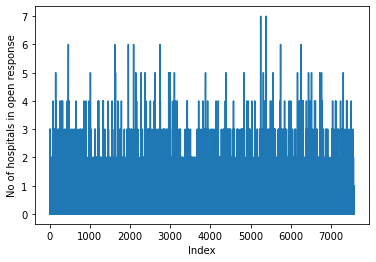

In [12]:
plt.plot(data['nhospitals'])
plt.xlabel('Index')
plt.ylabel('No of hospitals in open response')

Text(0, 0.5, 'Number of Patients')

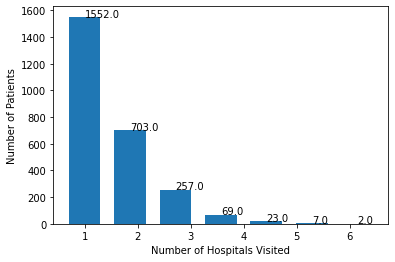

In [13]:
rel_data = data[data['nhospitals'] > 0]

arr = plt.hist(rel_data['nhospitals'], bins=7, rwidth=0.7, align='left')
my_bins = len(arr[0])
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

plt.xlabel('Number of Hospitals Visited')
plt.ylabel('Number of Patients')



In [14]:
# find which rows in data has a string under column g5_06a
data['g5_06a'] = data['g5_06a'].astype(int)

In [15]:
# primary_schooling is 1, no schooling is 2
# we want to switch these 2 values
data[data['g5_06a'] == 1 ] = 0
data[data['g5_06a'] == 2 ] = 1
data[data['g5_06a'] == 0 ] = 2

In [16]:
# deleting rows with unknown education i.e. 5
print("Data shape before: ", data.shape)
data = data[data['g5_06a'] != 5]
print("Data shape after: ", data.shape)

Data shape before:  (7580, 110)
Data shape after:  (7488, 110)


In [17]:
#correlation between number of hospitals visited per case and level of education of patient
corr_val = data['nhospitals'].corr(data['g5_06a'])
print(corr_val)


-0.29271987715055175


In [18]:
# find which rows in data has a nan and exclude those rows under column g4_08
data = data[~data['g4_08'].isna()]

In [19]:
# check how many NaNs in g4_08. should be zero
data['g4_08'].isna().sum()

0

In [20]:
# find which rows in data has a string under column g4_08
data['g4_08'] = data['g4_08'].astype(int)

In [21]:
corr_val = data['nhospitals'].corr(data['g4_08'])
print(corr_val)

0.690069328358475


In [22]:
data['gs_text34_x'] = data['gs_text34_x'].astype(int) # change dtype from object to int

In [23]:
# create a new column
data['cause_of_death'] = data["gs_text34_x"]

# set all of these classes to class 1 - CANCERS
data['cause_of_death'][data['gs_text34_x'].isin([9, 22, 26, 29, 30, 32, 33, 34])] = 1

# set all of these classes to class 2 - ACCIDENTS
data['cause_of_death'][data['gs_text34_x'].isin([6, 11, 14, 15, 16, 31])] = 2

# set all of these classes to class 3 - DISEASES
data['cause_of_death'][data['gs_text34_x'].isin([3, 8, 10, 19, 24, 28])] = 3

# set all of these classes to class 4 - HEART RELATED
data['cause_of_death'][data['gs_text34_x'].isin([4, 5, 12, 17, 25])] = 4

# set all of these classes to class 5 - BRAIN
data['cause_of_death'][data['gs_text34_x'].isin([2, 23])] = 5

# set all of these classes to class 6 - LIVER
data['cause_of_death'][data['gs_text34_x'].isin([1, 7])] = 6

# set all of these classes to class 7 - OTHER REASONS
data['cause_of_death'][data['gs_text34_x'].isin([13, 18, 21])] = 7

# set all of these classes to class 8 - SUICIDE
data['cause_of_death'][data['gs_text34_x'].isin([20])] = 8

# set all of these classes to class 9 - HOMICIDE
data['cause_of_death'][data['gs_text34_x'].isin([27])] = 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykerne

In [24]:
# print all unique values in cause of death - newly created column 
data['cause_of_death'].unique()

array([5, 6, 4, 2, 3, 1, 9, 7, 8])

In [25]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [26]:
# these are the features that the model will train on to predict cause of death
X = data[['g5_06a', 'g4_08']]
# this is the ground truth - we know that this info is true 
y = data['cause_of_death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate model
model1 = RandomForestClassifier(n_estimators=200)

# train model
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [27]:
# predict on test set
y_pred1 = model1.predict(X_test)
score1 = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy of model 1 is: ", score1)

Accuracy of model 1 is:  0.7513368983957219


In [28]:
# this is model 2

# these are the features that the model will train on to predict cause of death
X = data[['g5_06a', 'g4_08', 'nhospitals']]
# this is the ground truth - we know that this info is true 
y = data['cause_of_death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate model
model2 = RandomForestClassifier(n_estimators=200)

# train model
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
# predict on test set
y_pred2 = model2.predict(X_test)
score2 = metrics.accuracy_score(y_test, y_pred2)
print("Accuracy of model 2 is:", score2)

# if I want to reduce the decimal -- print("Accuracy of model 2 is: {0:.2f}".format(score2))

Accuracy of model 2 is: 0.7486631016042781


In [30]:
# these are the features that the model will train on to predict cause of death
X = data[['g4_08', 'nhospitals']]
# this is the ground truth - we know that this info is true 
y = data['gs_text34_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate model
model3 = RandomForestClassifier(n_estimators=200)

# train model
model3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
# predict on test set
y_pred3 = model3.predict(X_test)
score3 = metrics.accuracy_score(y_test, y_pred3)
print("Accuracy of model 3 is: ", score3)

Accuracy of model 3 is:  0.7040998217468806


In [32]:
# these are the features that the model will train on to predict cause of death
#dc = death certificate issued or not 
data_dc = data[~data['a6_09'].isna()]
X = data_dc[['a6_09']]
X = X.dropna()
# this is the ground truth - we know that this info is true 
y = data_dc['gs_text34_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate model
model4 = RandomForestClassifier(n_estimators=200)

# train model
model4.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [33]:
# predict on test set
y_pred4 = model4.predict(X_test)
score4 = metrics.accuracy_score(y_test, y_pred4)
print("Accuracy of model 4 is: ", score4)

Accuracy of model 4 is:  0.6970509383378016


In [34]:
# these are the features that the model will train on to predict cause of death
#dc = death certificate issued or not 
data_dc = data[~data['a6_09'].isna()]
X = data_dc[['a6_09', 'nhospitals']]
X = X.dropna()
# this is the ground truth - we know that this info is true 
y = data_dc['gs_text34_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate model
model5 = RandomForestClassifier(n_estimators=200)

# train model
model5.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
# predict on test set
y_pred5 = model5.predict(X_test)
score5 = metrics.accuracy_score(y_test, y_pred5)
print("Accuracy of model 5 is: ", score5)

Accuracy of model 5 is:  0.7135835567470956


In [36]:
# these are the features that the model will train on to predict cause of death
#dc = death certificate seen by the interviewer or not 
data_dc = data[~data['a6_10'].isna()]
X = data_dc[['a6_10']]
X = X.dropna()
# this is the ground truth - we know that this info is true 
y = data_dc['gs_text34_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate model
model7 = RandomForestClassifier(n_estimators=200)

# train model
model7.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [37]:
# predict on test set
y_pred7 = model7.predict(X_test)
score7 = metrics.accuracy_score(y_test, y_pred7)
print("Accuracy of model 7 is: ", score7)

Accuracy of model 7 is:  0.698306595365419


In [38]:
# these are the features that the model will train on to predict cause of death
#dc = death certificate seen by the interviewer or not 
data_dc = data[~data['a6_10'].isna()]
X = data_dc[['a6_10']]
X = X.dropna()
# this is the ground truth - we know that this info is true 
y = data_dc['gs_text34_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate model
model8 = RandomForestClassifier(n_estimators=200)

# train model
model8.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [39]:
# predict on test set
y_pred8 = model8.predict(X_test)
score8 = metrics.accuracy_score(y_test, y_pred8)
print("Accuracy of model 8 is: ", score8)

Accuracy of model 8 is:  0.6978609625668449


# New Section

In [40]:
# Count the Number of Occurrences of '10' (Maternal causes of death) in the list 'gs_text34_x using .count()
items = data['gs_text34_x']
counts = items.value_counts()
print('Count = ', counts[10])

#items.shape means printing the total number of items present in the column
#items.head() means printing the first 5 rows of that dataframe
#from 'data_verbal_autopsies.csv' import gs_text34_x
#counts = 

Count =  129


In [41]:
print('percentage of occurrences of 10=', 100*counts[10]/items.shape[0])

percentage of occurrences of 10= 1.7250601765177855


In [42]:
data.shape[0]

7478